Se auto to notebook prospathisa na problepso tin troxia tou X Coordinate!!!!
- η διαφορα του με το 5_XYZ_only_norm ειναι οτι to normalization εχει boundaries για καθε row.
- Σε αυτο θα βρω τα συνολικα xminmax, yminmax, zminmax και θα χρησιμοποιησω αυτα.

# Check 5_XYZ_only_norm2_1.

## I used tanh and wanted scaling [-1, 1]

In [60]:
import numpy as np
from pathlib import Path
import sys
sys.path.insert(0, "C:\\Users\\geork\\projects\\AIThesis\\src\\src")

from  dataset_reader import DatasetFromFiles

# Preprocessing on dataset

In [61]:
path = Path("C:\\Users\\geork\\projects\\AIThesis\\datasets\\20240510\\mlres")
out_path = Path("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\crash_xyz_coordinate_timeseries.csv")
# Check if out_path already exists
if out_path.exists():
    print(f"The file or directory {out_path} already exists.")
    # Handle the case where the file already exists, if needed
else:
    # Proceed with your operations
    r = DatasetFromFiles(path)
    r.setTimeSeriesLabel("Head_X_Coordinate")
    r.setTimeSeriesLabel("Head_Y_Coordinate")
    r.setTimeSeriesLabel("Head_Z_Coordinate")
    r.setOutputPath(out_path, True)
    r.read()

The file or directory C:\Users\geork\projects\AIThesis\src\analysis\ThesisChapters\5_4\crash_xyz_coordinate_timeseries.csv already exists.


In [62]:
from dataset_reader import DatasetReaderCSV
path = Path("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\crash_xyz_coordinate_timeseries.csv")
reader = DatasetReaderCSV(path)
reader.read()
df = reader.convert_to_dataframe()
df.iloc[0]

Id                                                                                          0
Path                                        C:\Users\geork\projects\AIThesis\datasets\2024...
CarProfile                                                                                FCR
Velocity                                                                                  100
Translation                                                                              -200
Rotation                                                                                    0
Position                                                                              initial
HIC15_max                                                                              86.843
HIC36_max                                                                             136.373
Head_Z_Acceleration_abs_max                                                            36.081
Head_X_Acceleration_abs_max                                 

In [63]:
import ast

def str_to_list(s):
    return ast.literal_eval(s)

df["Head_X_Coordinate"] = df["Head_X_Coordinate"].apply(str_to_list)
df["Head_Y_Coordinate"] = df["Head_Y_Coordinate"].apply(str_to_list)
df["Head_Z_Coordinate"] = df["Head_Z_Coordinate"].apply(str_to_list)

In [64]:
from car_profile_expand import expand_car_profiles
df = df.drop(columns=["Path", "Id", "HIC15_max", "HIC36_max",
                      "Head_X_Acceleration_abs_max",
                      "Head_Y_Acceleration_abs_max",
                      "Head_Z_Acceleration_abs_max",
                      "BrIC_abs_max",
                      "Chest_Resultant_Acceleration_max",
                      "Chest_Resultant_Acceleration_CLIP3ms_max",
                      "Position"],
                    errors="ignore")
df = df.reset_index(drop=True)
try:
    df = df.apply(expand_car_profiles, axis=1)
except:
    pass

df = df.drop(columns="CarProfile", errors="ignore")
new_order = ["Velocity", 
             "Translation", 
             "Rotation", 
             "Bumber_Height",
             "Front_Hood_Height", 
             "Bumber_Hood_Angle",
             "Hood_Length", 
             "Back_Hood_Height",  
             "Head_X_Coordinate", 
             "Head_Y_Coordinate", 
             "Head_Z_Coordinate"
             ]
df = df[new_order]
#df = df.sample(frac=1).reset_index(drop=True)
df

,Velocity,Translation,Rotation,Bumber_Height,Front_Hood_Height,Bumber_Hood_Angle,Hood_Length,Back_Hood_Height,Head_X_Coordinate,Head_Y_Coordinate,Head_Z_Coordinate
0,100,-200,0,770,740,16,1150,980,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-288.045, -288.045, -288.045, -288.045, -288....","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1,100,-200,120,770,740,16,1150,980,"[334.04, 334.04, 334.04, 334.04, 334.04, 334.0...","[-90.522, -90.522, -90.522, -90.522, -90.522, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
2,100,-200,150,770,740,16,1150,980,"[285.841, 285.841, 285.841, 285.841, 285.841, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
3,100,-200,180,770,740,16,1150,980,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-24.681, -24.681, -24.681, -24.681, -24.681, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
4,100,-200,210,770,740,16,1150,980,"[154.159, 154.159, 154.159, 154.159, 154.159, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
...,...,...,...,...,...,...,...,...,...,...,...
1181,80,400,300,580,900,11,1160,1130,"[113.96, 113.96, 113.96, 113.96, 113.96, 113.9...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1182,80,400,30,580,900,11,1160,1130,"[293.841, 293.841, 293.841, 293.841, 293.841, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1183,80,400,330,580,900,11,1160,1130,"[162.159, 162.159, 162.159, 162.159, 162.159, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1184,80,400,60,580,900,11,1160,1130,"[342.04, 342.04, 342.04, 342.04, 342.04, 342.0...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."


In [65]:
from tqdm import tqdm

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Checking rows", unit="row"):
    if (len(row["Head_X_Coordinate"]) != 301): print("Error!!")
    if (len(row["Head_Y_Coordinate"]) != 301): print("Error!!")
    if (len(row["Head_Z_Coordinate"]) != 301): print("Error!!")

Checking rows: 100%|██████████| 1186/1186 [00:00<00:00, 13462.53row/s]



Expanded DataFrame:
     Head_X_Coordinate  Head_Y_Coordinate  Head_Z_Coordinate
0              220.000           -288.045           1575.416
1              220.000           -288.045           1575.411
2              220.000           -288.045           1575.396
3              220.000           -288.045           1575.391
4              220.000           -288.045           1575.377
..                 ...                ...                ...
296           2724.310           -409.036            947.462
297           2738.592           -410.063            948.136
298           2752.923           -411.087            948.848
299           2767.306           -412.109            949.599
300           2781.744           -413.132            950.386

[301 rows x 3 columns]


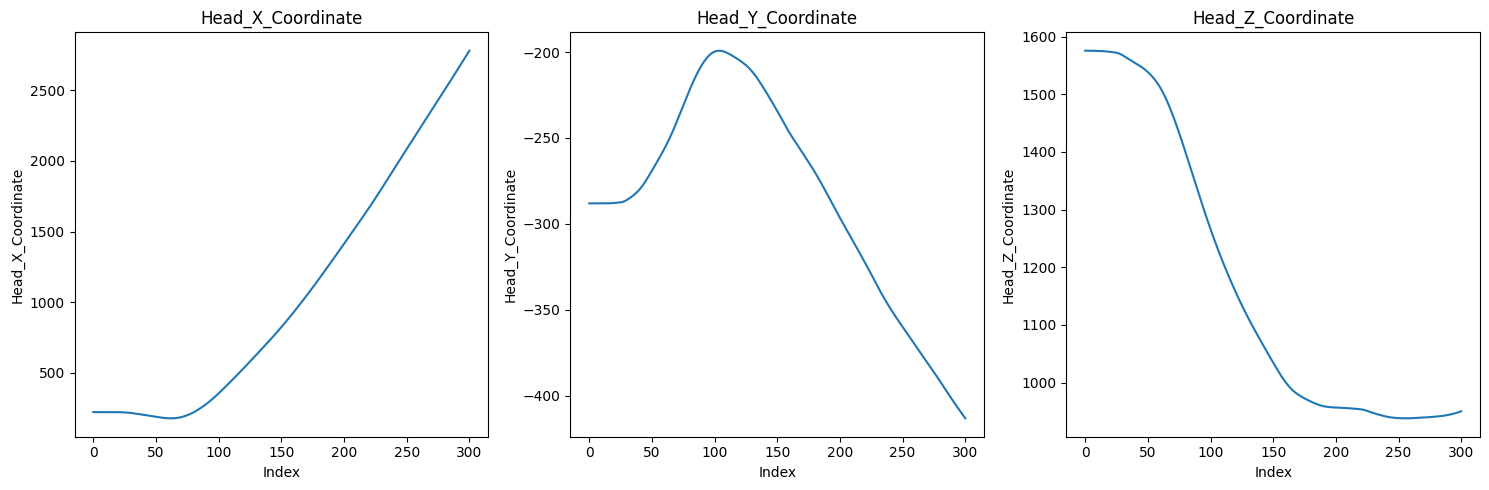

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import random 

def print_plot(df, labels, start, end):
    expanded_data = {label: [] for label in labels}
    
    for label in labels:
        for idx, sublist in enumerate(df[label]):
            for item in sublist:
                expanded_data[label].append(item)
    
    expanded_df = pd.DataFrame(expanded_data)
    print("\nExpanded DataFrame:")
    print(expanded_df[start:end])
    
    fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))
    
    for i, label in enumerate(labels):
        expanded_df[label][start:end].plot(ax=axes[i], title=label)
        axes[i].set_ylabel(label)
        axes[i].set_xlabel('Index')
    
    plt.tight_layout()
    plt.show()

def print_plot_simulation(df, labels, sim_index):
    start = 301 * sim_index
    end   = 301 * sim_index + 301
    print_plot(df, labels, start, end)

def print_plot_random_simulation(df, labels):
    rand_int = random.randint(0, int(df.shape[0]))
    print_plot_simulation(df, labels, rand_int)
    
labels = ["Head_X_Coordinate", "Head_Y_Coordinate", "Head_Z_Coordinate"]
#labels = ["Head_X_Coordinate"]
#print_plot_random_simulation(df, labels)
print_plot_simulation(df, labels, 0)

In [67]:
# split the df in train, test val.
# I want to split it before converting the compact lists into another df,
# so that each simulation will remain unchanged.
import pandas as pd
from sklearn.model_selection import train_test_split

train_size = 0.6
val_size = 0.2
test_size = 0.2

train_df, temp_df = train_test_split(df, train_size=train_size, random_state=13)
val_df, test_df = train_test_split(temp_df, test_size=test_size/(test_size + val_size), random_state=14)

In [68]:
train_df.shape

# To train_df einai (711, 11)
# Kapoies apo tis times tou 11 einai listes me 300 stoixeia.

(711, 11)

In [69]:
def split_dataframe(df, scalar_columns, input_first, output_next):
    # Extract scalar features
    X_scalar = df[scalar_columns].values

    # Extract sequence features (first 75 values)
    X_seq = np.array(
        [
            df['Head_X_Coordinate'].apply(lambda x: x[:input_first]).values.tolist(),
            df['Head_Y_Coordinate'].apply(lambda x: x[:input_first]).values.tolist(),
            df['Head_Z_Coordinate'].apply(lambda x: x[:input_first]).values.tolist()
            ])
    # Transpose X_seq to have shape (num_samples, input_first, 3)
    X_seq = np.transpose(X_seq, (1, 2, 0))

    # Extract target sequences (next 'output_next' values)
    y_seq = np.array([
        df['Head_X_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist(),
        # df['Head_Y_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist(),
        # df['Head_Z_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist()
                    ])

    # Transpose y_seq to have shape (num_samples, 10, 3)
    y_seq = np.transpose(y_seq, (1, 2, 0))

    # Concatenate scalar features with sequence features
    # Expanding X_scalar to have shape (num_samples, 1, num_features) to concatenate with X_seq
    X_scalar_expanded = np.expand_dims(X_scalar, axis=1)

    # Repeat scalar features to match the sequence length (input_first timesteps)
    X_scalar_repeated = np.repeat(X_scalar_expanded, input_first, axis=1)

    # Concatenate along the feature dimension
    X = np.concatenate([X_scalar_repeated, X_seq], axis=-1)

    # y_train is just the target sequences (y_seq)
    y = y_seq
    return X, y

In [70]:
scalar_columns = ['Velocity', 'Translation', 'Rotation', 'Bumber_Height', 
                'Front_Hood_Height', 'Bumber_Hood_Angle', 
                'Hood_Length', 'Back_Hood_Height']

first_steps = 75
next_steps = 125

X_train, y_train = split_dataframe(train_df, scalar_columns, first_steps, next_steps)
X_test, y_test = split_dataframe(test_df, scalar_columns, first_steps, next_steps)
X_val, y_val = split_dataframe(val_df, scalar_columns, first_steps, next_steps)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")



X_train shape: (711, 75, 11), y_train shape: (711, 125, 1)


In [71]:
X_train[0]
X_train[0][0]


# X_train[0] perigrafei ta prota 75 timesteps MIAS sigrousis einai mia sigrousi
# X_train[0][0] perigrafei to proto timestep apo ta 75 me 11 times, (8 scalars -> velocity, position, cardprofile etc) + (3 trajectory values, X Y Z [scalars])

# y_train[0] perigrafei ta epomena 125 timesteps mias sigrousis.
# y_train[0][0] einai ena vector me treis times X, Y, Z (scalars) pou perigrafei ta trajectory values, ti xroniki stigmi 126 tis sigkrousis.



array([ 100.   ,  200.   ,  270.   ,  500.   ,  680.   ,   20.   ,
       1200.   ,  920.   ,   80.318,  243.637, 1575.416])

In [72]:
# from pprint import pprint
# print(train_df.iloc[0]["Head_Y_Coordinate"][:75])
# print(X_train[0, :, -2])

# An thelo na to kano uncomment, de kanei kati apla epivevaiono optika oti oi times einai oi sostes.

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Reshape to 2D (flatten the last dimension)

X_train_reshaped = X_train.reshape(-1, X_train.shape[2])

# Apply the scaler (you can also use MinMaxScaler here)
x_scaler = MinMaxScaler(feature_range=(-1, 1))
# x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train_reshaped)
# Reshape back to 3D (711, 75, 11)
X_train_scaled = X_train_scaled.reshape(X_train.shape)
# Now X_train_scaled is normalized
X_train_scaled.shape


(711, 75, 11)

In [74]:
import joblib
scaler_filename = "C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test\\x_scaler.save"
joblib.dump(x_scaler, scaler_filename)

['C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test\\x_scaler.save']

In [75]:
X_val_reshaped = X_val.reshape(-1, X_val.shape[2])
X_val_scaled = x_scaler.transform(X_val_reshaped)
X_val_scaled = X_val_scaled.reshape(X_val.shape)

X_test_reshaped = X_test.reshape(-1, X_test.shape[2])
X_test_scaled = x_scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

In [76]:
# Scaling test values

print(f"y_train shape: {y_train.shape}")
y_train_reshaped = y_train.reshape(-1, y_train.shape[2])

# Apply the scaler (you can also use MinMaxScaler here)
y_scaler = MinMaxScaler(feature_range=(-1, 1))
# y_scaler = StandardScaler()
print(f"y_train_reshaped: {y_train_reshaped.shape}")
y_train_scaled = y_scaler.fit_transform(y_train_reshaped)
# Reshape back to 3D (711, 75, 11)
y_train_scaled = y_train_scaled.reshape(y_train.shape)
# Now X_train_scaled is normalized

import joblib
scaler_filename = "C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test\\y_scaler.save"
joblib.dump(y_scaler, scaler_filename)

y_val_reshaped = y_val.reshape(-1, y_val.shape[2])
y_val_scaled = y_scaler.transform(y_val_reshaped)
y_val_scaled = y_val_scaled.reshape(y_val.shape)

y_test_reshaped = y_test.reshape(-1, y_test.shape[2])
y_test_scaled = y_scaler.transform(y_test_reshaped)
y_test_scaled = y_test_scaled.reshape(y_test.shape)


y_train shape: (711, 125, 1)
y_train_reshaped: (88875, 1)


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

outpunum = 1

model = Sequential()
model.add(InputLayer((first_steps, 11)))
model.add(Bidirectional(LSTM(32, return_sequences=True)))  # First LSTM layer
model.add(LSTM(64, return_sequences=True))  # Second LSTM layer
model.add(LSTM(128))  # Third LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.001)))  # Dense layer with L2 regularization
model.add(Dense(next_steps * outpunum, activation="tanh"))  # Output layer with tanh activation
model.add(Reshape((next_steps, outpunum)))  # Reshape to match the target output shape (10, outpunum)


model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 75, 64)         │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 75, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 125)            │         4,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 125, 1)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,357 (591.24 KB)

 Trainable params: 151,357 (591.24 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
print(f"X_train_scaled.shape: {X_train_scaled.shape} y_train_scaled.shape: {y_train_scaled.shape}")

X_train_scaled.shape: (711, 75, 11) y_train_scaled.shape: (711, 125, 1)


In [79]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

def warmup_schedule(epoch, lr):
    warmup_epochs = 30
    max_lr = 0.0001
    if epoch < warmup_epochs:
        return lr + (max_lr / warmup_epochs)
    return max_lr

cp = ModelCheckpoint("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test\\model12.keras", save_best_only=True)

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lr_scheduler = LearningRateScheduler(warmup_schedule)

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0000001), metrics=[RootMeanSquaredError()])

history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), 
          epochs=100000, 
          callbacks=[cp, 
                     es,
                     lr_scheduler
                     ])

Epoch 1/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 370ms/step - loss: 0.3621 - root_mean_squared_error: 0.5586 - val_loss: 0.3569 - val_root_mean_squared_error: 0.5549 - learning_rate: 1.0333e-04
Epoch 2/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - loss: 0.3397 - root_mean_squared_error: 0.5394 - val_loss: 0.3277 - val_root_mean_squared_error: 0.5292 - learning_rate: 1.0667e-04
Epoch 3/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 324ms/step - loss: 0.3120 - root_mean_squared_error: 0.5144 - val_loss: 0.2902 - val_root_mean_squared_error: 0.4938 - learning_rate: 1.1000e-04
Epoch 4/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - loss: 0.2771 - root_mean_squared_error: 0.4806 - val_loss: 0.2517 - val_root_mean_squared_error: 0.4545 - learning_rate: 1.1333e-04
Epoch 5/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.2347 - root_mean_squared_error: 0.4357 - val_loss: 0.2162 - val_root_mean_squared_error: 0.4151 - learning_rate: 1.1667e-04
Epoch 6/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 177m

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0063 - root_mean_squared_error: 0.0739
Test Loss: [0.006082967855036259, 0.07230325788259506]


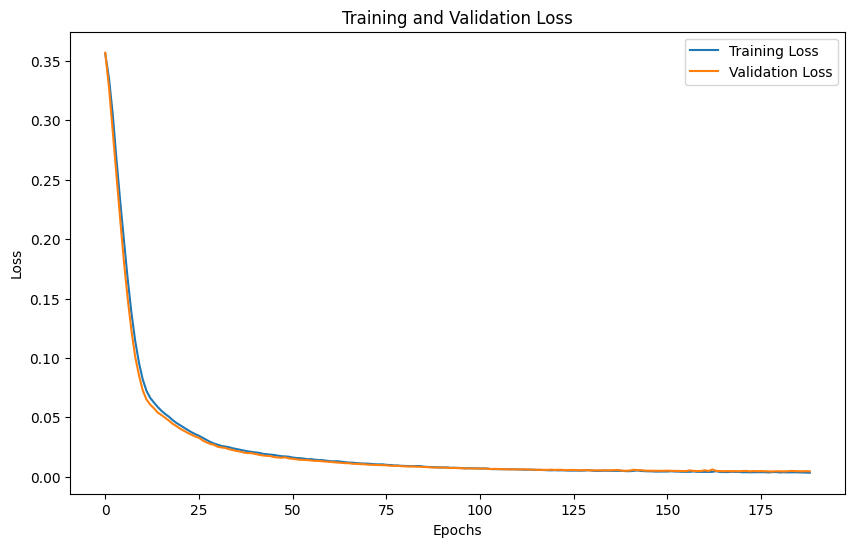

In [80]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test_scaled, y_test_scaled)
print(f'Test Loss: {test_loss}')

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [81]:
from tensorflow.keras.models import load_model
model = load_model("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test\model12.keras")

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions3(initial_seq, true_values, predicted_values, coordinate_name, row):
    # Concatenate the sequences
    initial_and_true = np.concatenate([initial_seq, true_values], axis=0)
    initial_and_pred = np.concatenate([initial_seq, predicted_values], axis=0)
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot the true and predicted values on the first subplot
    axs[0].plot(range(len(initial_and_true)), initial_and_true, label='True Values', marker='o')
    axs[0].plot(range(len(initial_and_pred)), initial_and_pred, label='Predicted Values', marker='x')
    axs[0].axvline(x=len(initial_seq)-1, color='r', linestyle='--', label='Prediction Start')
    axs[0].set_title(f'True vs Predicted Values for {coordinate_name}')
    axs[0].set_xlabel('Timesteps')
    axs[0].set_ylabel(f'{coordinate_name} Value')
    axs[0].legend()
    
    # Example of another plot (e.g., residuals or difference between predicted and true values)
    original_timeseries = np.array(row[coordinate_name])
    axs[1].plot(range(len(original_timeseries)), original_timeseries, label="Timeseries")
    axs[1].axvline(x=len(initial_seq)-1, color='r', linestyle='--', label='Prediction Start')
    axs[1].set_title(f'Original {coordinate_name} trajectory')
    axs[1].set_xlabel('Timesteps')
    axs[1].set_ylabel(f'{coordinate_name} Value')
    axs[1].legend()

        # Extract the initial sequence from the DataFrame
    


In [83]:
# Assuming model is trained and X_train, y_train are defined
def scale_with(sequence, y_scaler):
    print(f"Shape: {sequence.shape}")
    return y_scaler.transform(sequence)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step
Mpainei edo

initial seq shape: (75,)
initial seq shape: (75, 1)
Shape: (75, 1)


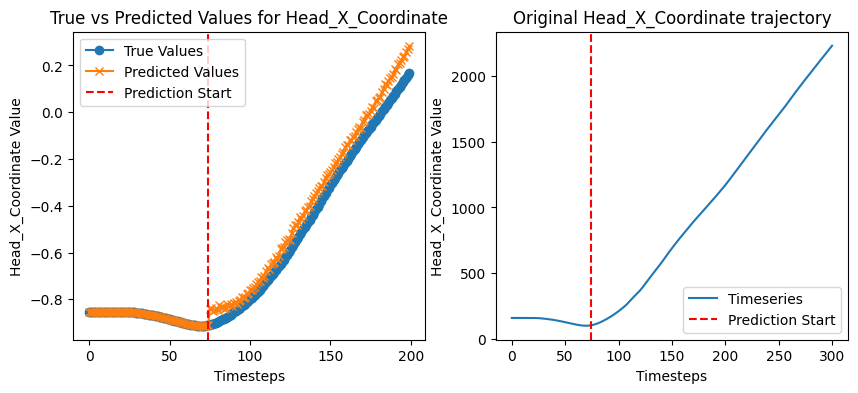

In [84]:
# One coordinate prediction
sample_index = 2
one_dimensional = True
predictions_scaled = model.predict(X_test_scaled)

if one_dimensional:
    print("Mpainei edo\n")
    #predictions_scaled = model.predict(X_test_scaled)
    #print(predictions_scaled.shape)
    #print(predictions_scaled[0])
    initial_seq = X_test[sample_index, :, -3]
    print(f"initial seq shape: {initial_seq.shape}")
    initial_seq = initial_seq.reshape((75, 1))
    print(f"initial seq shape: {initial_seq.shape}")
    initial_seq_scaled = scale_with(initial_seq, y_scaler)
    true_values = y_test_scaled[sample_index, :, :]  # True values
    predicted_values = predictions_scaled[sample_index, :, :]  # Predicted values
    # # Plot for Head_X_Coordinate
    plot_predictions3(initial_seq_scaled[:, 0], true_values[:, 0], predicted_values[:, 0], 'Head_X_Coordinate', test_df.iloc[sample_index])
else:
    # # Take initial sequence
    initial_seq = X_test[sample_index, :, -3:]  # Last 3 features are the coordinates
    print(f"initial seq shape: {initial_seq.shape}")

    # print(initial_seq.shape)
    initial_seq_scaled = scale_with(initial_seq, y_scaler)
    true_values = y_test_scaled[sample_index, :, :]  # True values
    predicted_values_scaled = predictions_scaled[sample_index, :, :]  # Predicted values
    # # Plot for Head_X_Coordinate
    plot_predictions3(initial_seq_scaled[:, 0], true_values[:, 0], predicted_values_scaled[:, 0], 'Head_X_Coordinate', test_df.iloc[sample_index])
    # # Plot for Head_Y_Coordinate
    plot_predictions3(initial_seq_scaled[:, 1], true_values[:, 1], predicted_values_scaled[:, 1], 'Head_Y_Coordinate', test_df.iloc[sample_index])
    # # Plot for Head_Z_Coordinate
    plot_predictions3(initial_seq_scaled[:, 2], true_values[:, 2], predicted_values_scaled[:, 2], 'Head_Z_Coordinate', test_df.iloc[sample_index])


In [85]:
# Assuming model is trained and X_train, y_train are defined
#def scale_with(sequence, y_scaler):
#    print(f"Shape: {sequence.shape}")
#    return y_scaler.transform(sequence)

# Make predictions

# Example for the first sample in the dataset
#sample_index = 2

# # Take initial sequence
# # initial_seq = X_test[sample_index, :, -3:]  # Last 3 features are the coordinates
#initial_seq = X_test[sample_index, :, -3]  # Last X features are the coordinates
#print(f"initial seq shape: {initial_seq.shape}")



# print(initial_seq.shape)
#initial_seq_scaled = scale_with(initial_seq, y_scaler)
# true_values = y_test_scaled[sample_index, :, :]  # True values
# predicted_values_scaled = predictions_scaled[sample_index, :, :]  # Predicted values
# # Plot for Head_X_Coordinate
# plot_predictions3(initial_seq_scaled[:, 0], true_values[:, 0], predicted_values_scaled[:, 0], 'Head_X_Coordinate', test_df.iloc[sample_index])

# # Plot for Head_Y_Coordinate
# plot_predictions3(initial_seq_scaled[:, 1], true_values[:, 1], predicted_values_scaled[:, 1], 'Head_Y_Coordinate', test_df.iloc[sample_index])

# # Plot for Head_Z_Coordinate
# plot_predictions3(initial_seq_scaled[:, 2], true_values[:, 2], predicted_values_scaled[:, 2], 'Head_Z_Coordinate', test_df.iloc[sample_index])


# initial_seq = X_test[sample_index, :, -3:]  # Last 3 features are the coordinates
# true_values = y_test[sample_index, :, :]  # True values
# predicted_values = predictions[sample_index, :, :]  # Predicted values
# # Plot for Head_X_Coordinate
# plot_predictions3(initial_seq[:, 0], true_values[:, 0], predicted_values[:, 0], 'Head_X_Coordinate', test_df.iloc[sample_index])


: 